hands-on นี้ดัดแปลงมาจาก tutorial ของ www.kaggle.com และ qiskit.org

In [1]:
!pip install qiskit_machine_learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.7/148.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 12.2 MB/s eta 0:00:00
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=517897 sha256=ecb25636cbe7fa6a012a843da0872ad2bd077

In [4]:
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

from qiskit_machine_learning.datasets import ad_hoc_data #adhoc_data = fn สุ่ม data ขึ้นมามั่วๆ

# Linear Classification Support Vector Machine

เราจะศึกษาลักษณะของการทำ Support Vector Machine โดยการสร้างข้อมูลตัวอย่างขึ้นมา

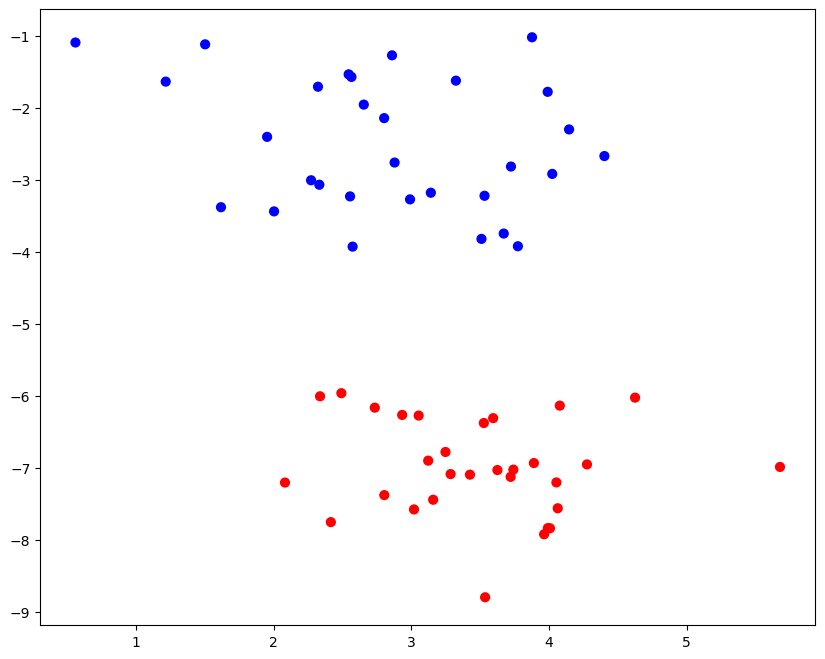

In [5]:
from sklearn.datasets import make_blobs, make_circles

x, y = make_blobs(n_samples=60, centers=2, random_state=30, cluster_std=0.8) # Generate samples

plt.figure(figsize=(10, 8)) # Plot
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap='bwr')

ลองวาดเส้นแบ่ง 3 เส้น เพื่อแบ่งข้อมูลเป็นสองส่วน

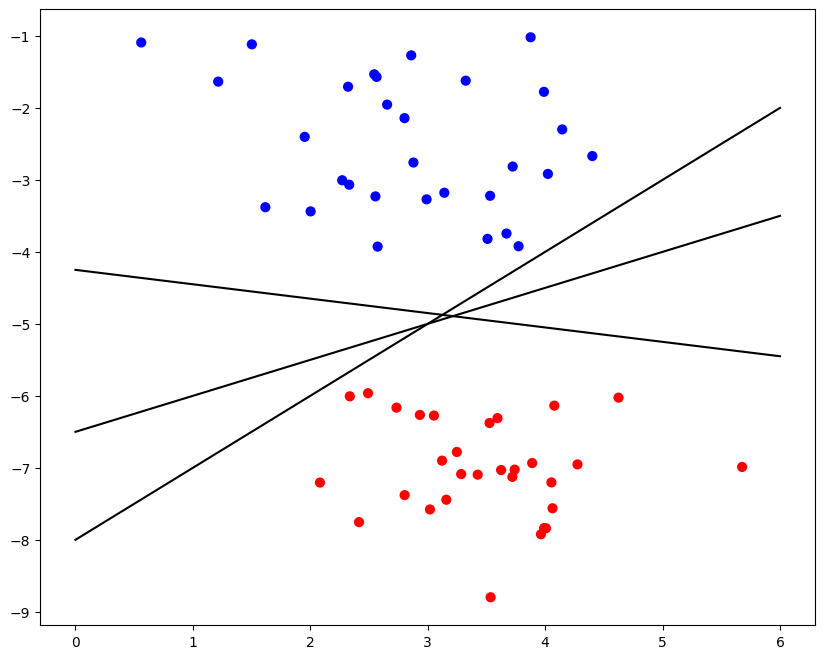

In [6]:
plt.figure(figsize=(10, 8))
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap='bwr')

# Draw three split lines
x_temp = np.linspace(0, 6)
for m, b in [(1, -8), (0.5, -6.5), (-0.2, -4.25)]:
    y_temp = m * x_temp + b
    plt.plot(x_temp, y_temp, '-k')

Support vector machine จะแบ่งข้อมูลเป็น 2 ส่วนให้มีระยะห่างกันมากที่สุด ซึ่งเส้นที่แบ่งข้อมูลนี้จะเรียกว่า hyperplane และระยะระหว่างข้อมูลเรียกว่า margin เราต้องการสร้าง hyperplane (w,b) ที่ทำให้เกิด margin มากที่สุด
$$
max\,\,d\,=\,\frac{2}{||w||}
$$

ในตัวอย่างนี้เราจึงทำ SVM โดยใช้ linear classification method

In [7]:
from sklearn.svm import SVC

linear_svc = SVC(kernel='linear')
linear_svc.fit(x, y)

SVC(kernel='linear')

เราจะได้จุดที่เป็น support vector ดังนี้

In [8]:
linear_svc.support_vectors_

array([[ 2.57325754, -3.92687452],
       [ 2.49156506, -5.96321164],
       [ 4.62473719, -6.02504452]])

ต่อไปเราจะวาด hyperplane และ margin สำหรับข้อมูลตัวอย่างชุดนี้

In [9]:
def svc_plot(model):

    # Get the current axes submap data and prepare for drawing the split line
    ax = plt.gca()
    x = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 50)
    y = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 50)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # Draw a dividing line using the outline method
    ax.contour(X, Y, P, colors='green', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

    # Mark the location of the support vector
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], c='green', s=100)

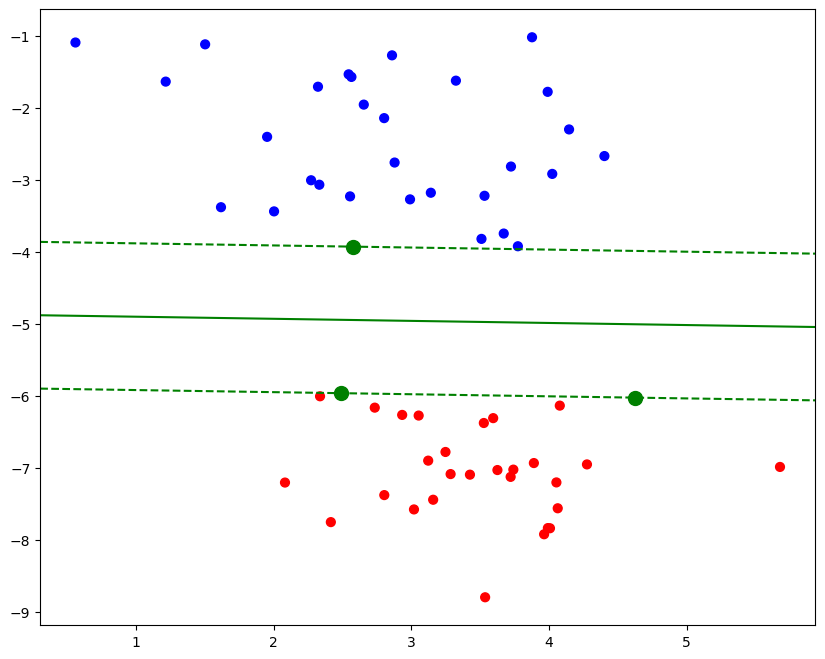

In [10]:
# Draw maximum separation support vector diagram

plt.figure(figsize=(10, 8))
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap='bwr')
svc_plot(linear_svc)

# Non-Linear Classification SVM
ตัวอย่างข้างต้นเป็นข้อมูลที่สามารถแบ่งได้โดยใช้เส้นตรง แต่ข้อมูลลักษณะที่ใช้งานจริงส่วนใหญ่จะไม่สามารถแบ่งได้ง่ายๆเช่นนี้ ดังนั้นในการแบ่งกลุ่มข้อมูลที่ไม่สามารถใช้เส้นตรงได้จะใช้วิธีการที่เรียกว่า **kernel trick** ซึ่งจะเป็นการแปลงข้อมูลที่แบ่งแบบเชิงเส้นไม่ได้ ให้สามารถแบ่งแบบเชิงเส้นได้

*ใจความสำคัญของ kernel trick คือการแปลงข้อมูลจากมิติที่น้อยไปเป็นชุดข้อมูลที่มีมิติสูงกว่า เพื่อให้ชุดข้อมูลนั้นสามารถแบ่งแบบเชิงเส้นได้ในมิติที่สูงกว่า*

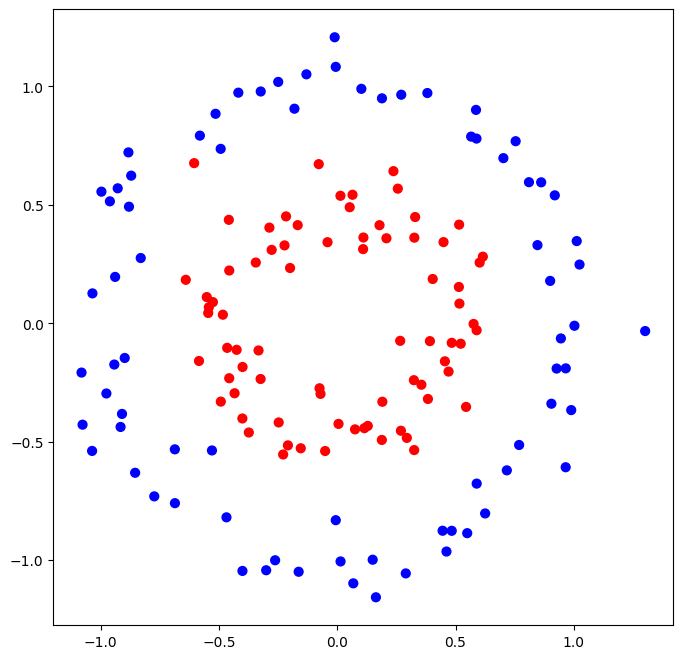

In [11]:
x2, y2 = make_circles(150, factor=.5, noise=.1, random_state=30) # Generate samples

plt.figure(figsize=(8, 8)) # Plot
plt.scatter(x2[:, 0], x2[:, 1], c=y2, s=40, cmap='bwr')

ชุดข้อมูลตัวอย่างนี้ไม่สามารถแบ่งแบบเชิงเส้นได้ เราจึงต้องใช้ kernel trick เพื่อแบ่งข้อมูล โดยในตัวอย่างนี้เราจะใช้การแปลงแบบ
$$
k(x_i,x_j)\,=\,x_i^2+x_j^2
$$

$$(z^2 = x^2 + y^2)$$


In [12]:
def kernel_function(xi, xj): #define kernel (expand dimension)
    poly = np.exp(-(xi**2 + xj**2)) # e^-x เพื่อให้กระจายตัวเเบบ gaussian
    return poly

Text(0.5, 0, 'r')

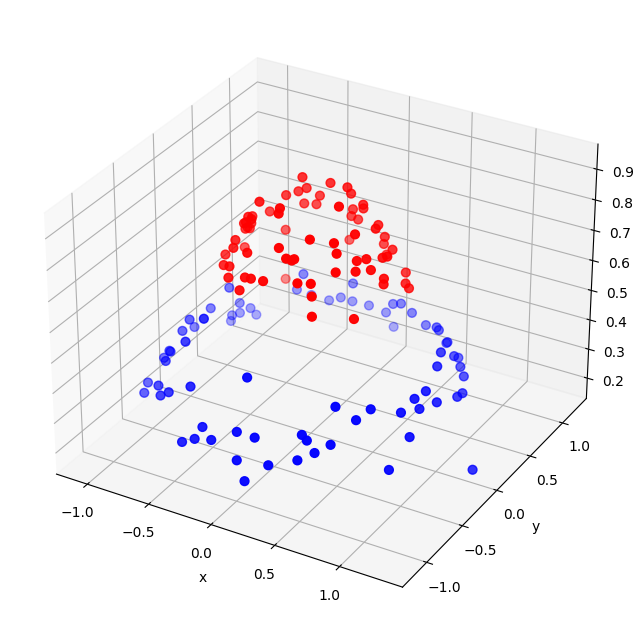

In [13]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

r = kernel_function(x2[:,0], x2[:,1])
plt.figure(figsize=(10, 8))
ax = plt.subplot(projection='3d')
ax.scatter3D(x2[:, 0], x2[:, 1], r, c=y2, s=40, cmap='bwr')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')

ในตอนนี้ข้อมูลของเราถูกแปลงไปอยู่ใน hyperspace ดังรูปข้างต้น ต่อไปเราจะใช้ radial basis kernel function (RBF) ในการหา hyperplane และ margin

In [14]:
rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(x2, y2)

SVC()

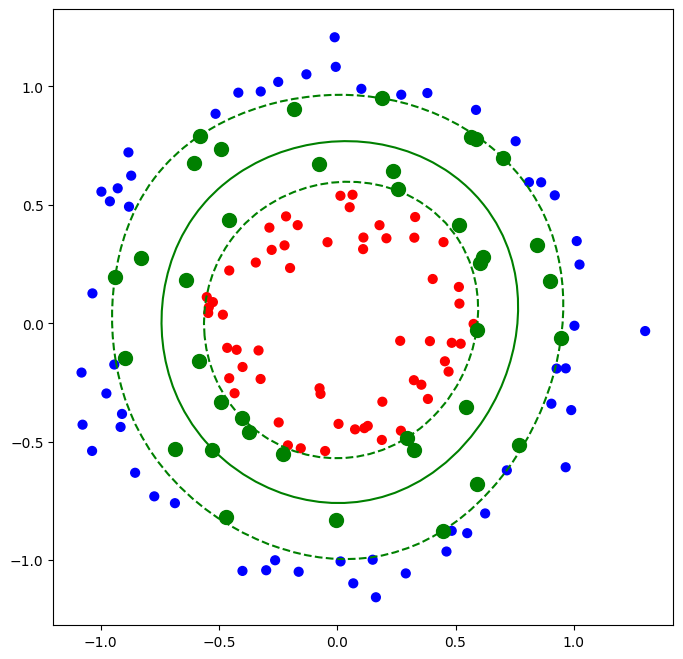

In [15]:
plt.figure(figsize=(8, 8))
plt.scatter(x2[:, 0], x2[:, 1], c=y2, s=40, cmap='bwr')

svc_plot(rbf_svc)

# Exercise 1
ให้สร้าง hyperplane จากข้อมูลตัวอย่างที่กำหนด

In [16]:
from sklearn.datasets import load_iris #iris flower data set #Ref https://en.wikipedia.org/wiki/Iris_flower_data_set

iris = load_iris()
X = iris.data[:, :3]  # we only take the first three features.
Y = iris.target

ทำให้เป็น binary classification

In [23]:
X = X[np.logical_or(Y==0,Y==1)]
Y = Y[np.logical_or(Y==0,Y==1)]

สร้าง hyperplane

In [24]:
model = SVC(kernel = 'linear')#support vector classifier
clf = model.fit(X,Y) #ตัวเเปร

วาด hyperplane ที่แบ่งชุดข้อมูลตัวอย่าง (ห้ามแก้ code ส่วนนี้)

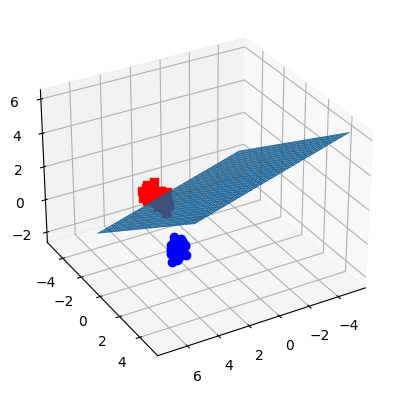

In [25]:
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]

tmp = np.linspace(-5,5,30)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
ax.plot_surface(x, y, z(x,y))
ax.view_init(30, 60)
plt.show()

# Quantum Support Vector Machine


```
# ex case : มีข้อมูล 4 ตัว -> ใช้เพียงเเค่2 qubit  เพื่อเก็บข้อมุล -> ประหยัด resource
```
ต่อจากนี้เราจะทดสอบการใช้ quantum support vector machine ในการแบ่งข้อมูล โดยการสร้างชุดข้อมูลตัวอย่างดังนี้

# 1. Creating the sample data

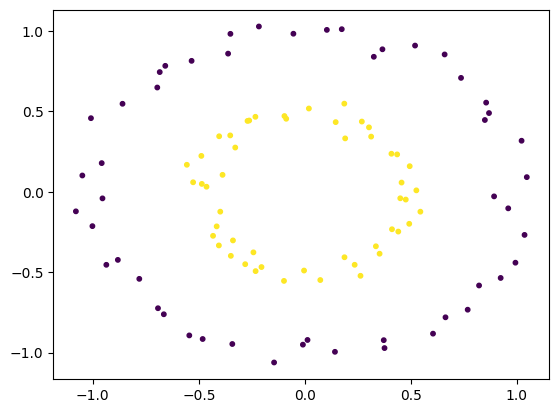

In [17]:
data = make_circles(n_samples=100, factor=0.5, noise=0.05) #อย่าลืม import ข้างบน
X_train = data[0]
Y_train = data[1]
plt.scatter(X_train[:, 0], X_train[:, 1], s=10, c=Y_train);

In [26]:
train_size = 100
sample_train = X_train[:train_size]
labels_train = Y_train[:train_size]

# 2. Feature mapping
ต่อจากนี้จะเป็นการทำ feature mapping จาก classical data ไปเป็น quantum circuit

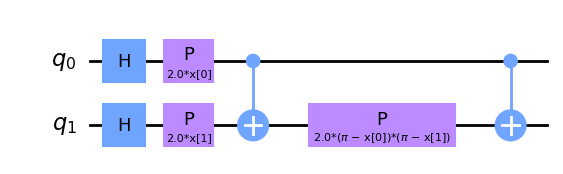

In [19]:
from qiskit import Aer, execute #3จำนวนfeature ขึ้นกับ จนqubit                              #อย่าลืม install pylatexenc
from qiskit.circuit.library import PauliFeatureMap, ZFeatureMap, ZZFeatureMap #import feature map
from qiskit_machine_learning.kernels import QuantumKernel #import kernel

adhoc_feature_map = ZZFeatureMap(feature_dimension=2, reps=1, entanglement="linear")
adhoc_feature_map.decompose().draw('mpl')
#result -> ผลออกมาเป็น state(ket |> ) เพื่อนำไป dot กับ bra (<|)

# 3. Defining Kernel
เราจะสร้าง kernel จาก feature mapping circuit ที่เรากำหนดไว้

In [27]:
adhoc_kernel = QuantumKernel(feature_map=adhoc_feature_map, quantum_instance=Aer.get_backend('statevector_simulator')) #คำนวณ kernel เก็บไว้ในตัวเเปร adhoc_kernel

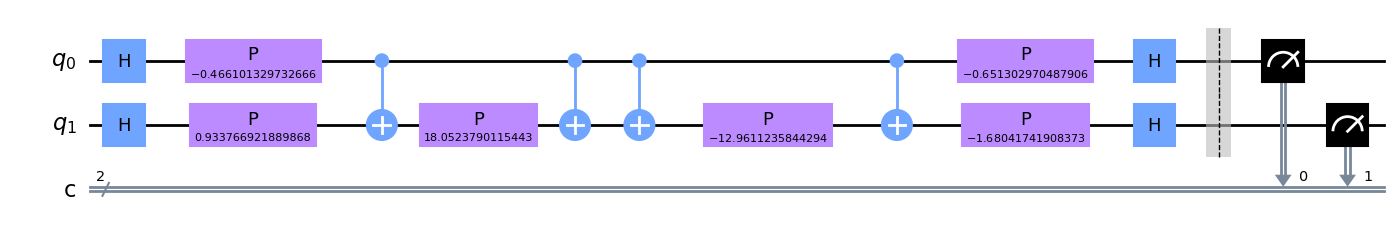

In [28]:
adhoc_circuit = adhoc_kernel.construct_circuit(sample_train[0], sample_train[1])
adhoc_circuit.decompose().decompose().draw(output='mpl') #bra*ket = หา kernel -> ดูว่า 2 state ซ้อนทับกันเเค่ไหน # P = Z Gate

# Exercise 2
 ทดลองสร้าง kernel จาก feature mapping แบบอื่นเช่น PauliFeatureMap และ ZFeatureMap

In [ ]:
# your code here





# 4. Running on Simulator
เราจะคำนวน kernel บน quantum simulator

In [ ]:
backend = Aer.get_backend('qasm_simulator')
job = execute(adhoc_circuit, backend, shots=8192,
              seed_simulator=1024, seed_transpiler=1024)
counts = job.result().get_counts(adhoc_circuit)

หลังจากนั้นเราจะนำผลที่ได้จาก quantum simulator มาหา hyperplane

In [ ]:
adhoc_svc = SVC(kernel=adhoc_kernel.evaluate)
adhoc_svc.fit(X_train, Y_train)
adhoc_score_callable_function = adhoc_svc.score(X_test, Y_test)

print(f"Callable kernel classification test score: {adhoc_score_callable_function}")

Callable kernel classification test score: 0.625


In [ ]:
from qiskit_machine_learning.algorithms import QSVC

qsvc = QSVC(quantum_kernel=adhoc_kernel)
qsvc.fit(X_train, Y_train)
qsvc_score = qsvc.score(X_test, Y_test)

print(f"QSVC classification test score: {qsvc_score}")

QSVC classification test score: 0.625


In [ ]:
print(f"Classification Model                    | Accuracy Score")
print(f"---------------------------------------------------------")
print(f"SVC using kernel as a callable function | {adhoc_score_callable_function:10.2f}")
print(f"QSVC                                    | {qsvc_score:10.2f}")

Classification Model                    | Accuracy Score
---------------------------------------------------------
SVC using kernel as a callable function |       0.91
QSVC                                    |       0.91


In [ ]:
import plotly.express as px
import pandas as pd

def x2y2(x, y):
  return x**2 + y**2

df = pd.DataFrame({"x":X_train[:, 0], "y":X_train[:, 1], "z":x2y2(X_train[:, 0], X_train[:, 1])})
fig = px.scatter_3d(df, x='x', y='y', z='z')
fig.update_traces(marker_size = 5)
fig.show()


In [ ]:
X_3 = np.concatenate([X_train, x2y2(X_train[:, 0], X_train[:, 1])[None, :].T], axis=1)
clf = SVC(kernel='linear')
clf.fit(X_3,Y_train)

SVC(kernel='linear')

In [ ]:
w = clf.coef_[0]
xx, yy = np.meshgrid(*np.array([X_3.min(axis=0), X_3.max(axis=0)])[:,:2].T)
zz = -(w[0]/w[2])*xx -(w[1]/w[2])*yy - clf.intercept_[0]/w[2]

In [ ]:
import plotly.graph_objs as go

go.Figure([go.Scatter3d(x=X_3[:,0], y=X_3[:,1], z=X_3[:,2], mode="markers", showlegend=False,
                        marker=dict(color=Y_train, size=2.5, line=dict(color="black", width=1))),
           go.Surface(x=xx, y=yy, z=zz, opacity=.5, showscale=False,
                      surfacecolor=np.zeros(zz.shape), colorscale=[[0, 'grey']])])